In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

from keras import models
from keras import layers
import os
import numpy as np
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 16,812,867
Non-trainable params: 0
_________________________________________________________________


In [2]:

base_dir = './dataset7'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

batch_size = 20
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

#unfreeze_weights(conv_base, from "block3_conv1")
conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_*':
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False
        
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),#optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=165,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)
# 1)
model_json = model.to_json()
with open("model_0216.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights('vgg16_0426.h5')
import matplotlib.pyplot as plt

# 2)
model.save('Capstone_vgg16_미세조정_0426.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Found 1067 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Epoch 1/165
 - 14s - loss: 1.0051 - acc: 0.5220 - val_loss: 0.8138 - val_acc: 0.7417
Epoch 2/165
 - 12s - loss: 0.8596 - acc: 0.6389 - val_loss: 0.7127 - val_acc: 0.7667
Epoch 3/165
 - 13s - loss: 0.7308 - acc: 0.7240 - val_loss: 0.5801 - val_acc: 0.8000
Epoch 4/165
 - 12s - loss: 0.6733 - acc: 0.7482 - val_loss: 0.5780 - val_acc: 0.8167
Epoch 5/165
 - 13s - loss: 0.5719 - acc: 0.8140 - val_loss: 0.5565 - val_acc: 0.7250
Epoch 6/165
 - 13s - loss: 0.5644 - acc: 0.7980 - val_loss: 0.5286 - val_acc: 0.8333
Epoch 7/165
 - 13s - loss: 0.5462 - acc: 0.8002 - val_loss: 0.4988 - val_acc: 0.8167
Epoch 8/165
 - 13s - loss: 0.4695 - acc: 0.8343 - val_loss: 0.4308 - val_acc: 0.8417
Epoch 9/165
 - 13s - loss: 0.4683 - acc: 0.8480 - val_loss: 0.4171 - val_acc: 0.8250
Epoch 10/165
 - 13s - loss: 0.4619 - acc: 0.8178 - val_loss: 0.4138 - val_acc: 0.8250
Epoch 11/165
 - 14s - loss: 0.4541 - acc: 0.8380 - val_loss: 0.408

Epoch 96/165
 - 13s - loss: 0.1129 - acc: 0.9684 - val_loss: 0.2944 - val_acc: 0.8750
Epoch 97/165
 - 12s - loss: 0.1318 - acc: 0.9620 - val_loss: 0.3615 - val_acc: 0.8500
Epoch 98/165
 - 13s - loss: 0.1330 - acc: 0.9620 - val_loss: 0.2897 - val_acc: 0.8833
Epoch 99/165
 - 13s - loss: 0.1504 - acc: 0.9520 - val_loss: 0.2976 - val_acc: 0.8833
Epoch 100/165
 - 12s - loss: 0.1372 - acc: 0.9639 - val_loss: 0.3532 - val_acc: 0.8583
Epoch 101/165
 - 13s - loss: 0.1352 - acc: 0.9540 - val_loss: 0.3431 - val_acc: 0.8583
Epoch 102/165
 - 13s - loss: 0.1583 - acc: 0.9479 - val_loss: 0.3244 - val_acc: 0.8667
Epoch 103/165
 - 13s - loss: 0.1279 - acc: 0.9720 - val_loss: 0.3724 - val_acc: 0.8333
Epoch 104/165
 - 13s - loss: 0.1466 - acc: 0.9500 - val_loss: 0.3439 - val_acc: 0.8750
Epoch 105/165
 - 13s - loss: 0.1263 - acc: 0.9660 - val_loss: 0.3147 - val_acc: 0.8583
Epoch 106/165
 - 13s - loss: 0.1273 - acc: 0.9720 - val_loss: 0.2845 - val_acc: 0.8833
Epoch 107/165
 - 12s - loss: 0.1222 - acc: 0.96

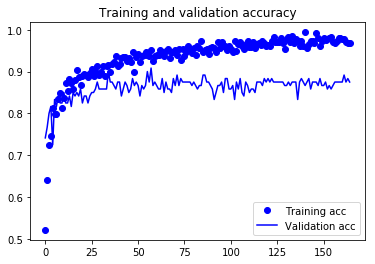

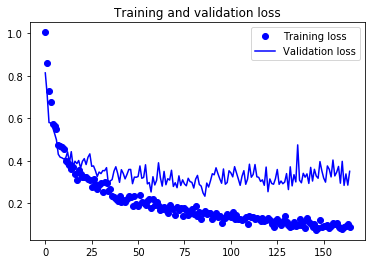

In [3]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()